In [1]:
%load_ext autoreload
%autoreload 2

train_path = "/rds/user/hpcpin1/hpc-work/SegProject/Datasets/Cytomine/Zebra/Train"
test_path = "/rds/user/hpcpin1/hpc-work/SegProject/Datasets/Cytomine/Zebra/Test"
val_path = "/rds/user/hpcpin1/hpc-work/SegProject/Datasets/Cytomine/Zebra/Val" 

In [2]:
import sys 
sys.path.append('..')

In [3]:
from models.hybrid import Hybrid as Hybrid
from models.hybridSkip import Hybrid as Skip
from models.hybridDoubleSkip import Hybrid as DoubleSkip

import os 

import torch
from torchvision import transforms
import numpy as np

from utils.dataLoader import LandmarksDataset, ToTensor, Rescale
from sklearn.metrics import mean_squared_error
import scipy.sparse as sp
from utils.utils import scipy_to_torch_sparse, genMatrixesLH, genMatrixesOne

In [4]:
img_path = os.path.join(test_path, 'Images')
label_path = os.path.join(test_path, 'landmarks')
test_dataset = LandmarksDataset(img_path=img_path,
                                 label_path=label_path,
                                 transform = transforms.Compose([
                                             Rescale(1024),
                                             ToTensor()])
                                 )

device = 'cuda:0'

In [5]:
from models.hybridNoPool import Hybrid as HybridNoPool

#A, AD, D, U = genMatrixesLH()
A, AD, D, U = genMatrixesOne(25)


A = sp.csc_matrix(A).tocoo()
AD = sp.csc_matrix(AD).tocoo()
D = sp.csc_matrix(D).tocoo()
U = sp.csc_matrix(U).tocoo()

D_ = [D.copy()]
U_ = [U.copy()]

config = {}
config['n_nodes'] = [120, 120, 120, 120, 120, 120]

A_ = [A.copy(), A.copy(), A.copy(), A.copy(), A.copy(), A.copy()]

A_t, D_t, U_t = ([scipy_to_torch_sparse(x).to(device) for x in X] for X in (A_, D_, U_))

config['latents'] = 64
config['inputsize'] = 1024

f = 32
config['filters'] = [2, f, f, f, f//2, f//2, f//2]
config['skip_features'] = f
config['K'] = 6

hybridNP = HybridNoPool(config.copy(), D_t, U_t, A_t).to(device)
hybridNP.load_state_dict(torch.load("../weights/hybrid_no_pool/bestMSE_2000.pt"))
hybridNP.eval()
print('Model loaded')

Model loaded


In [6]:
#A, AD, D, U = genMatrixesLH()
A, AD, D, U = genMatrixesOne(25)


A = sp.csc_matrix(A).tocoo()
AD = sp.csc_matrix(AD).tocoo()
D = sp.csc_matrix(D).tocoo()
U = sp.csc_matrix(U).tocoo()

D_ = [D.copy()]
U_ = [U.copy()]
A_ = [A.copy(), A.copy(), A.copy(), AD.copy(), AD.copy(), AD.copy()]

#config = {}
#config['n_nodes'] = [120, 120, 120, 60, 60, 60]
N1 = A.shape[0]
N2 = AD.shape[0]

config = {}
config['n_nodes'] = config['n_nodes'] = [N1, N1, N1, N2, N2, N2]

A_t, D_t, U_t = ([scipy_to_torch_sparse(x).to(device) for x in X] for X in (A_, D_, U_))

config['latents'] = 64
config['inputsize'] = 1024

f = 32
config['filters'] = [2, f, f, f, f//2, f//2, f//2]
config['skip_features'] = f

config['window'] = (3,3)

config['K'] = 6
config['l1'] = 5
config['l2'] = 4

double54 = DoubleSkip(config.copy(), D_t, U_t, A_t).to(device)
double54.load_state_dict(torch.load("../weights/Skip/double_L54/best.pt"))
double54.eval()
print('Model loaded')

5-4


RuntimeError: Error(s) in loading state_dict for Hybrid:
	size mismatch for dec_lin.weight: copying a param with shape torch.Size([960, 64]) from checkpoint, the shape in current model is torch.Size([208, 64]).
	size mismatch for dec_lin.bias: copying a param with shape torch.Size([960]) from checkpoint, the shape in current model is torch.Size([208]).

In [7]:
config['l1'] = 6
config['l2'] = 5

double65 = DoubleSkip(config.copy(), D_t, U_t, A_t).to(device)
double65.load_state_dict(torch.load("/rds/user/hpcpin1/hpc-work/SegProject/Training/hybrid_zebra01091735/bestMSE.pt"))
double65.eval()
print('Model loaded')

6-5
Model loaded


In [8]:
config['l1'] = 4
config['l2'] = 3

double43 = DoubleSkip(config.copy(), D_t, U_t, A_t).to(device)
double43.load_state_dict(torch.load("../weights/Skip/double_L43/best.pt"))
double43.eval()
print('Model loaded')

4-3


RuntimeError: Error(s) in loading state_dict for Hybrid:
	size mismatch for dec_lin.weight: copying a param with shape torch.Size([960, 64]) from checkpoint, the shape in current model is torch.Size([208, 64]).
	size mismatch for dec_lin.bias: copying a param with shape torch.Size([960]) from checkpoint, the shape in current model is torch.Size([208]).

In [ ]:
hybrid = Hybrid(config, D_t, U_t, A_t).to(device)
hybrid.load_state_dict(torch.load("../weights/HybridGNet/best.pt"))
hybrid.eval()
print('Model loaded')

In [ ]:
config['layer'] = 3

Skip3 = Skip(config, D_t, U_t, A_t).to(device)
Skip3.load_state_dict(torch.load("../weights/Skip/skip_L3/best.pt"))
Skip3.eval()
print('Model loaded')

In [ ]:
config['layer'] = 4

Skip4 = Skip(config, D_t, U_t, A_t).to(device)
Skip4.load_state_dict(torch.load("../weights/Skip/skip_L4/best.pt"))
Skip4.eval()
print('Model loaded')

In [ ]:
config['layer'] = 5

Skip5 = Skip(config, D_t, U_t, A_t).to(device)
Skip5.load_state_dict(torch.load("../weights/Skip/skip_L5/best.pt"))
Skip5.eval()
print('Model loaded')

In [ ]:
config['layer'] = 6

Skip6 = Skip(config, D_t, U_t, A_t).to(device)
Skip6.load_state_dict(torch.load("../weights/Skip/skip_L6/best.pt"))
Skip6.eval()
print('Model loaded')

In [ ]:
from models.pca import PCA_Net

config['extended'] = False
config['device'] = device

pcaNet = PCA_Net(config.copy()).to(device)
pcaNet.load_state_dict(torch.load('../weights/baselines/pca/best.pt'))
pcaNet.eval()
print('Model loaded')

In [9]:
from models.vae_Zebra import VAE_Mixed

config['allOrgans'] = False

vae = VAE_Mixed(config.copy()).to(device)
vae.load_state_dict(torch.load('/rds/user/hpcpin1/hpc-work/SegProject/Training/vae_zebra01091735/bestMSE.pt'))
vae.eval()
print('Model loaded')

Model loaded


In [10]:
from models.unet import UNet

modelUNet = UNet(n_classes = 2).to(device)
modelUNet.load_state_dict(torch.load('/rds/user/hpcpin1/hpc-work/SegProject/Training/unet_zebra01091735/final.pt'))
modelUNet.eval()
print('Model loaded')

Model loaded


In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

model_list = [pcaNet, vae, hybrid, Skip3, Skip4, Skip5, Skip6, double43, double54, double65]
model_names = ['PCA', 'FC', 'HybridGNet', '1-SC Layer 3', '1-SC Layer 4','1-SC Layer 5','1-SC Layer 6', '2-SC Layers 4-3', '2-SC Layers 5-4', '2-SC Layers 6-5']

results1 = pd.DataFrame()

for i in range(0, len(test_dataset.images)):   
    print('\r',i+1,'of', len(test_dataset.images),end='')
    with torch.no_grad():
        sample = test_dataset[i]

        data, target = sample['image'], sample['landmarks']
        data = torch.unsqueeze(data, 0).to(device)
        target =  target[:120,:].reshape(-1).numpy()
        
        for j in range(0, len(model_list)):
            output = model_list[j](data)
            if len(output) > 1:
                output = output[0]
            output = output.cpu().numpy().reshape(-1)
            
            error = mean_squared_error(target * 1024, output * 1024)
            
            aux = pd.DataFrame([[i, error, model_names[j]]], columns=['i','MSE', 'Model'])
            results1 = pd.concat([results1, aux], ignore_index=True) #results1.append(aux, ignore_index = True)
            


NameError: name 'pcaNet' is not defined

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#model_list = [pcaNet, vae, hybrid, Skip3, Skip4, Skip5, Skip6, double43, double54, double65]
#model_names = ['PCA', 'FC', 'HybridGNet', '1-SC Layer 3', '1-SC Layer 4','1-SC Layer 5','1-SC Layer 6', '2-SC Layers 4-3', '2-SC Layers 5-4', '2-SC Layers 6-5']
model_list = [vae, double65]
model_names = ['FC', '2-SC Layers 6-5']

results1 = pd.DataFrame()

for i in range(0, len(test_dataset.images)):   
    print('\r',i+1,'of', len(test_dataset.images),end='')
    with torch.no_grad():
        sample = test_dataset[i]

        data, target = sample['image'], sample['landmarks']
        data = torch.unsqueeze(data, 0).to(device)
        target =  target[:120,:].reshape(-1).numpy()

        for j in range(0, len(model_list)):
            output = model_list[j](data)
            if len(output) > 1:
                output = output[0]
            output = output.cpu().numpy().reshape(-1)
            
            error = mean_squared_error(target * 1024, output * 1024)
            
            aux = pd.DataFrame([[i, error, model_names[j]]], columns=['i','MSE', 'Model'])
            results1 = pd.concat([results1, aux], ignore_index=True) #results1.append(aux, ignore_index = True)
            


 57 of 57

In [13]:
import pathlib
import re

def natural_key(string_):
    """See http://www.codinghorror.com/blog/archives/001018.html"""
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_)]

folder = "MultiAtlas/JSRT/images/output_points"
test = "../Datasets/JSRT/Test/landmarks"

data_root = pathlib.Path(folder)
all_files = list(data_root.glob('*.npy'))
all_files = [str(path) for path in all_files]
all_files.sort(key = natural_key)

for i in range(0, len(all_files)):
    data = np.load(all_files[i])[:240]
    target = np.load(all_files[i].replace(folder, test))[:240]
    
    error = mean_squared_error(target, data)

    aux = pd.DataFrame([[i, error, "MultiAtlas"]], columns=['i','MSE', 'Model'])
    results1 = pd.concat([results1, aux], ignore_index=True) #results1 = results1.append(aux, ignore_index = True)
    
model_names.append('MultiAtlas')

MSE
FC 	1247.944 +- 646.158
2-SC Layers 6-5 	903.865 +- 543.016
MultiAtlas 	492.262 +- 298.138



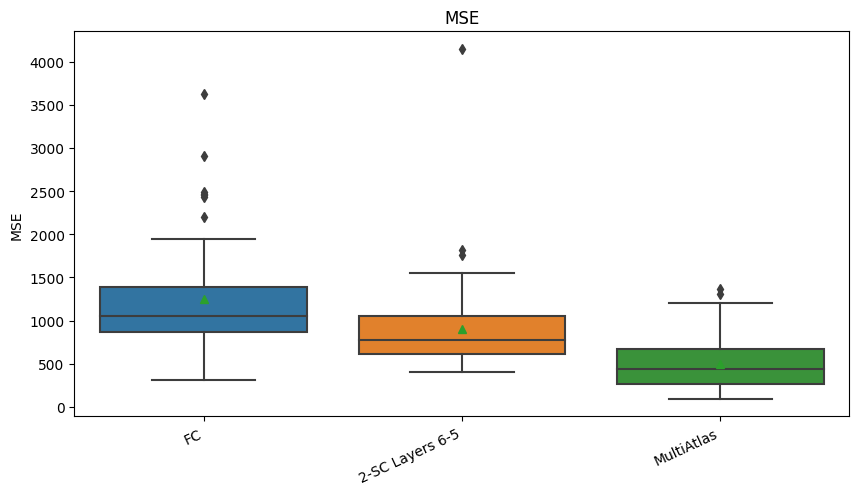

In [14]:
plt.figure(figsize = (10,5))
plt.tight_layout()
sns.boxplot(x = 'Model', y = 'MSE', data = results1, showmeans = True)
plt.xticks(rotation=25, ha="right" )
plt.ylabel('MSE')
plt.title('MSE')
plt.xlabel(None)

print('MSE')
for model in model_names:
    print(model, '\t' '%.3f'%np.mean(results1['MSE'][results1['Model'] == model]), '+- %.3f' % np.std(results1['MSE'][results1['Model'] == model]))

print('')

In [15]:
model_names.append('UNet')

In [16]:
aux = results1[results1['Model'] == '2-SC Layers 6-5']
aux0 = aux.sort_values(by = 'MSE')[-3:]
aux0

,i,MSE,Model
65,32,1760.525513,2-SC Layers 6-5
33,16,1818.626465,2-SC Layers 6-5
51,25,4148.042480,2-SC Layers 6-5


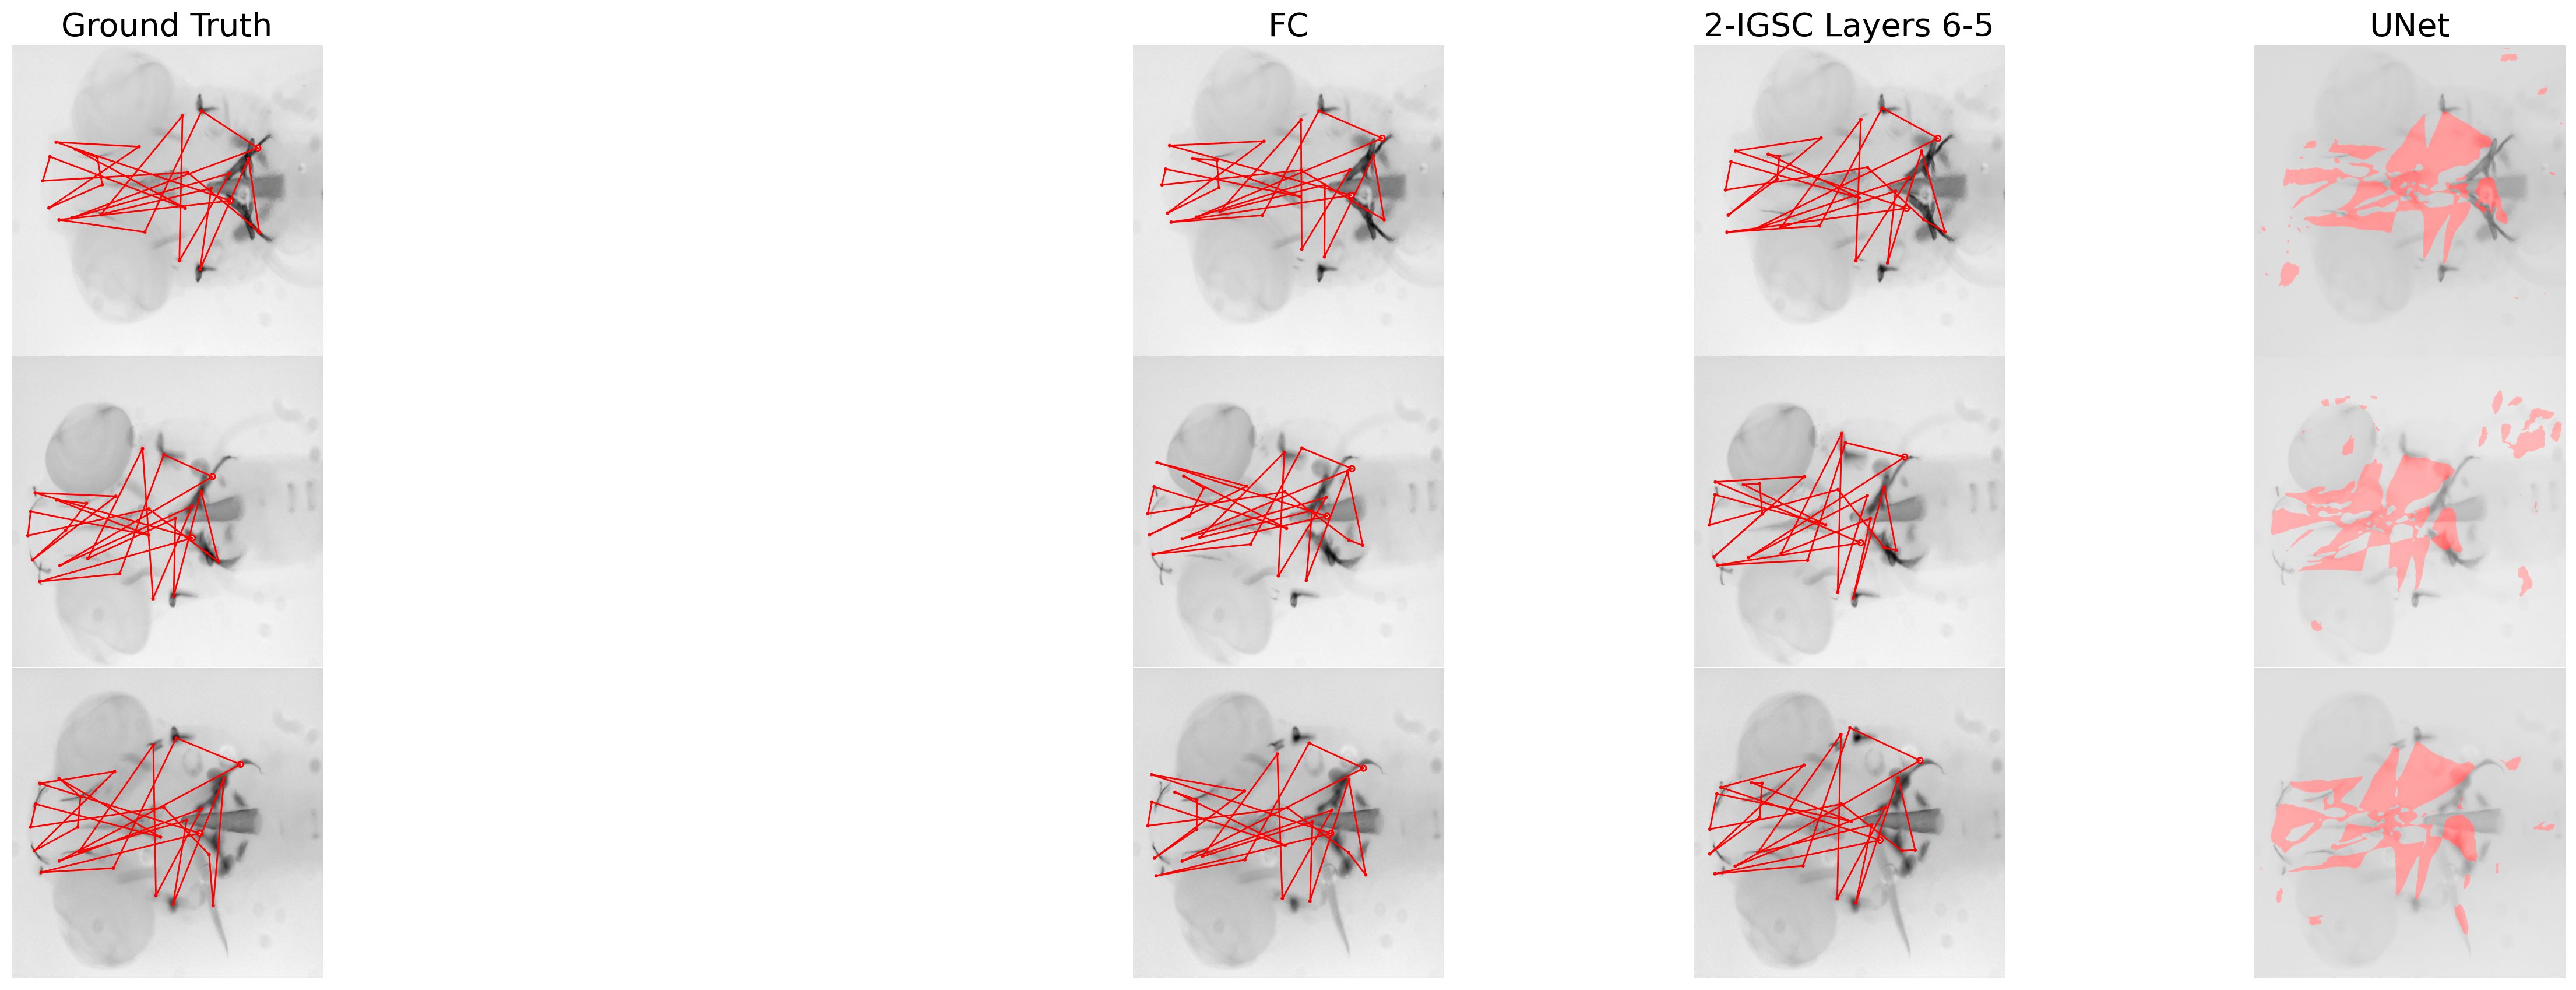

In [17]:
from utils.fun import drawOrgans

#model_list_ = [pcaNet, vae, hybrid, Skip6, double65]
#model_names_ = ['PCA', 'FC', 'HybridGNet', '1-IGSC Layer 6', '2-IGSC Layers 6-5']
model_list_ = [vae, double65]
model_names_ = ['FC', '2-IGSC Layers 6-5']

i_ =[5, 10, 15]

fig = plt.figure(figsize=(24, 8), dpi= 200)

c = 0

for i in i_:
    with torch.no_grad():
        sample = test_dataset[i]

        data, target = sample['image'], sample['landmarks']
        data = torch.unsqueeze(data, 0).to(device)
        target = target.reshape(-1).numpy()

        draw = data.cpu().numpy()[0,0,:,:]
        
        ax = plt.subplot(3, len(model_list_) + 3, 1 + c * (len(model_list_) + 3))
        plt.axis('off')
        plt.xlim(1, 1024)
        plt.ylim(1024, 1)
        
        target = np.clip(target, 0, 1)
        if c == 0:
            drawOrgans(ax, target[:240] * 1024, None, draw.copy())
            plt.title("Ground Truth", fontsize = 20)
        else:
            drawOrgans(ax, target[:240] * 1024, None, draw.copy())
        
        ax = plt.subplot(3, len(model_list_) + 3, 2 + c * (len(model_list_) + 3))
        
        #data_MA = test_dataset.images[i].replace('Datasets/JSRT/Test/Images', "Results/MultiAtlas/JSRT/images/output_points").replace(".png", ".npy")
        #data_MA = np.load(data_MA)[:240]
        
        plt.axis('off')
        plt.xlim(1, 1024)
        plt.ylim(1024, 1)
        #drawOrgans(ax, data_MA, None, draw.copy())
        #if c == 0:
            #plt.title("MultiAtlas", fontsize = 20)
        
        for j in range(0, len(model_list_)):
            output = model_list_[j](data)
            if len(output) > 1:
                output = output[0]
            output = output.cpu().numpy().reshape(-1) 
            output = np.clip(output, 0, 1)[:240]
            ax = plt.subplot(3, len(model_list_) + 3, j + 3 + c * (len(model_list_) + 3))
            plt.axis('off')
            if c == 0:
                drawOrgans(ax, output * 1024, None, draw.copy())
                plt.title(model_names_[j], fontsize = 20)
            else:
                drawOrgans(ax, output * 1024, None, draw.copy())
            
            plt.xlim(1, 1024)
            plt.ylim(1024, 1)

        
        ax = plt.subplot(3, len(model_list_) + 3, j + 4 + c * (len(model_list_) + 3))
        plt.axis('off')

        output = modelUNet(data)
        output = torch.argmax(output[0,:,:,:], axis=0).cpu().numpy()
        
        image=np.zeros(list(draw.shape) + [3])
        image[:,:,0] = draw + 0.7 * (output == 1).astype('float') - 0.3 * (output == 2).astype('float')
        image[:,:,1] = draw + 0.7 * (output == 2).astype('float') - 0.2 * (output == 1).astype('float')
        image[:,:,2] = draw - 0.2 * (output == 1).astype('float') - 0.3 * (output == 2).astype('float')
        image = np.clip(image, 0, 1)
        if c == 0:
            plt.title('UNet', fontsize = 20)
        plt.imshow(image)
        plt.xlim(1, 1024)
        plt.ylim(1024, 1)
        
        c += 1
        
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.01, hspace=0)      
plt.savefig('figs/compare_UNet.png', bbox_inches = 'tight', dpi=200)
plt.savefig('figs/compare_UNet.pdf', bbox_inches = 'tight', dpi=200)

In [18]:
from medpy.metric import dc, hd, assd, jc, asd
from utils.fun import reverseVector, drawBinary, reverseVectorOne

def evalImageMetrics(blank, output, target_lungs, target_heart):
    p1, p2, h, c1, c2 = reverseVector(output)
    
    ptest = drawBinary(blank.copy(), p1)
    ptest = drawBinary(ptest, p2)
    
    hdp = hd(ptest, target_lungs, voxelspacing = 0.35)
    dcp = dc(ptest, target_lungs)

    p1, p2, h, c1, c2 = reverseVector(output)
    
    ptest = drawBinary(blank.copy(), h)
    
    hdc = hd(ptest, target_heart, voxelspacing = 0.35)
    dcc = dc(ptest, target_heart)
    
    return [dcp, dcc, hdp, hdc]

def evalImageMetricsUNet(output, target_lungs, target_heart):
    dcp = dc(output == 1, target_lungs)
    dcc = dc(output == 2, target_heart)
    
    hdp = hd(output == 1, target_lungs, voxelspacing = 0.35)
    hdc = hd(output == 2, target_heart, voxelspacing = 0.35)
        
    return [dcp, dcc, hdp, hdc]

In [19]:
from medpy.metric import dc, hd, assd, jc, asd
from utils.fun import reverseVector, drawBinary, reverseVectorOne

def evalImageMetrics(blank, output, target_lungs):
    p1 = reverseVectorOne(output, 25)
    
    ptest = drawBinary(blank.copy(), p1)
    
    hdp = hd(ptest, target_lungs, voxelspacing = 0.35)
    dcp = dc(ptest, target_lungs)

    return [dcp, hdp]

def evalImageMetricsUNet(output, target_lungs):
    dcp = dc(output == 1, target_lungs)
    #dcc = dc(output == 2, target_heart)
    
    hdp = hd(output == 1, target_lungs, voxelspacing = 0.35)
    #hdc = hd(output == 2, target_heart, voxelspacing = 0.35)
        
    return [dcp, hdp]

In [20]:
blank = np.zeros([1024, 1024])

results = pd.DataFrame()

for i in range(0, len(test_dataset.images)):
    print('\r',i+1,'of', len(test_dataset.images),end='')
    with torch.no_grad():
        sample = test_dataset[i]

        data, target = sample['image'], sample['landmarks']
        data = torch.unsqueeze(data, 0).to(device)
        target =  target.reshape(-1).numpy()
        
        #p1, p2, h, c1, c2 = reverseVector(target * 1024)
        p1 = reverseVectorOne(target * 1024, 25)
        
        t_lungs = drawBinary(blank.copy(), p1)
        #t_lungs = drawBinary(t_lungs, p2)
        #t_heart = drawBinary(blank.copy(), h)
        
        for j in range(0, len(model_list)):
            output = model_list[j](data)
            if len(output) > 1:
                output = output[0]
                
            output = output.cpu().numpy().reshape(-1) 
            
            metrics = evalImageMetrics(blank, output * 1024, t_lungs)#, t_heart)
             
            aux = pd.DataFrame([[i, model_names[j]] + metrics], columns=['i','Model','Dice Lungs','HD Lungs'])
            results = pd.concat([results, aux], ignore_index=True) #results = results.append(aux, ignore_index = True)
        
        out = modelUNet(data)[0,:,:,:]
        seg = torch.argmax(out, axis = 0).cpu().numpy()
        metrics = evalImageMetricsUNet(seg, t_lungs)#, t_heart)
        
        aux = pd.DataFrame([[i, 'UNet'] + metrics], columns=['i','Model','Dice Lungs','HD Lungs'])
        results = pd.concat([results, aux], ignore_index=True) #results = results.append(aux, ignore_index = True)

 57 of 57

In [21]:
for i in range(0, len(all_files)):
    print('\r',i+1,'of', len(all_files),end='')
    
    data = np.load(all_files[i])[:240]
    target = np.load(all_files[i].replace(folder, test))[:240]
    
    p1 = reverseVectorOne(target, 25)
       
    t_lungs = drawBinary(blank.copy(), p1)
    #t_lungs = drawBinary(t_lungs, p2)
    #t_heart = drawBinary(blank.copy(), h)
        
    metrics = evalImageMetrics(blank, data, t_lungs)#, t_heart)
        
    aux = pd.DataFrame([[i, "MultiAtlas"] + metrics], columns=['i','Model','Dice Lungs','HD Lungs'])#['i','Model','Dice Lungs','Dice Heart','HD Lungs','HD Heart'])#, 'ASD Lungs', 'ASD Heart'])
    results = pd.concat([results, aux], ignore_index=True) #results = results.append(aux, ignore_index = True)

 51 of 51

/tmp/ipykernel_510607/2235237241.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


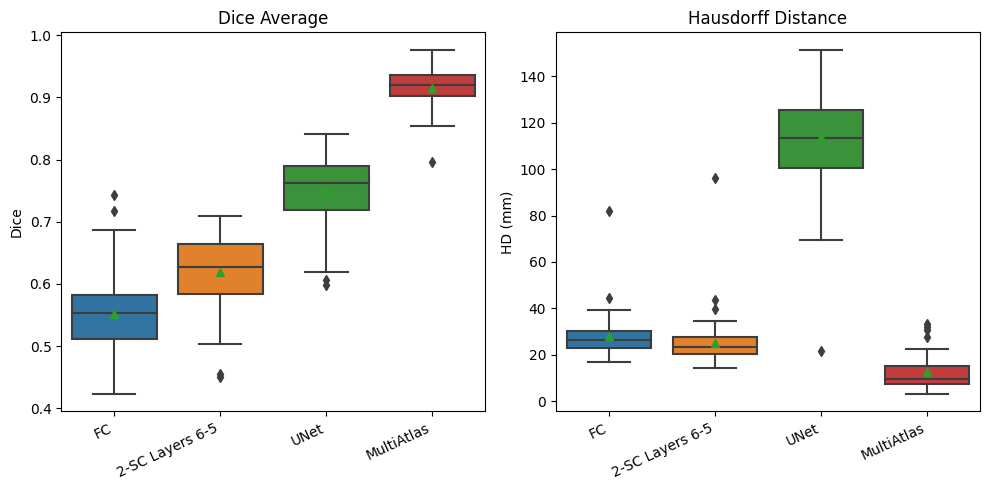

Dice
FC 0.551 +- 0.064
2-SC Layers 6-5 0.618 +- 0.059
MultiAtlas 0.915 +- 0.033
UNet 0.749 +- 0.056

Hausdorff
FC 28.026 +- 9.061
2-SC Layers 6-5 25.181 +- 11.085
MultiAtlas 12.378 +- 7.056
UNet 113.995 +- 21.191



In [22]:
import matplotlib.ticker as mticker

results['Dice Average'] = results['Dice Lungs'] #[['Dice Lungs', 'Dice Heart']].mean(axis=1)
results['HD Average'] = results['HD Lungs'] #['HD Lungs', 'HD Heart']].mean(axis=1)

plt.figure(figsize = (10,5))
plt.tight_layout()
ax = plt.subplot(1,2,1)
sns.boxplot(x = 'Model', y = 'Dice Average', data = results, showmeans = True)
plt.xticks(rotation=25, ha="right" )
plt.ylabel('Dice')
plt.title('Dice Average')
plt.xlabel(None)

ax = plt.subplot(1,2,2)
sns.boxplot(x = 'Model', y = 'HD Average', data = results, showmeans = True)
plt.xticks(rotation=25, ha="right" )
plt.ylabel('HD (mm)')
plt.title('Hausdorff Distance')
plt.xlabel(None)

plt.tight_layout()
#plt.savefig('figs/num3.png', dpi=300)
plt.show()

print('Dice')
for model in model_names:
    print(model, '%.3f'%np.mean(results['Dice Average'][results['Model'] == model]), '+- %.3f' % np.std(results['Dice Average'][results['Model'] == model]))

print('')

print('Hausdorff')
for model in model_names:
    print(model, '%.3f'%np.mean(results['HD Average'][results['Model'] == model]), '+- %.3f' % np.std(results['HD Average'][results['Model'] == model]))

print('')

/tmp/ipykernel_510607/2541004361.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


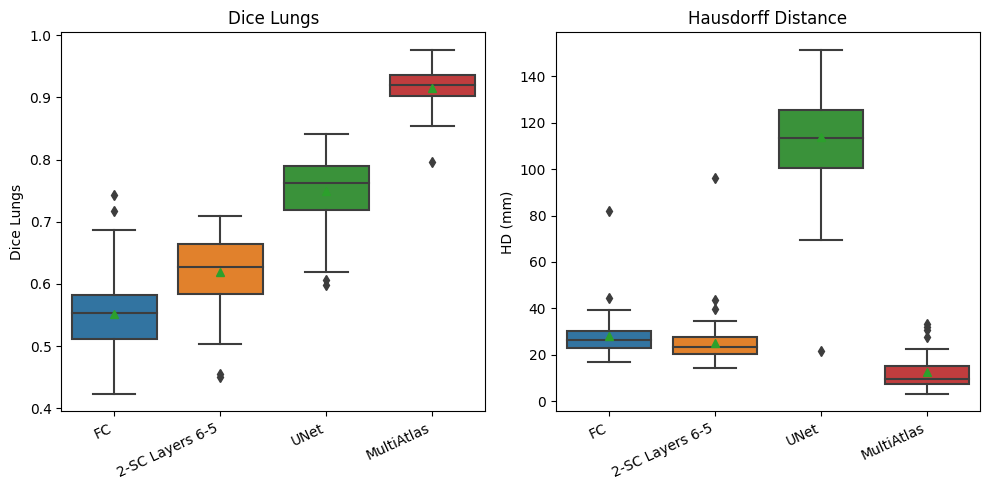

Dice
FC 0.551 +- 0.064
2-SC Layers 6-5 0.618 +- 0.059
MultiAtlas 0.915 +- 0.033
UNet 0.749 +- 0.056

Hausdorff
FC 28.026 +- 9.061
2-SC Layers 6-5 25.181 +- 11.085
MultiAtlas 12.378 +- 7.056
UNet 113.995 +- 21.191



In [23]:
plt.figure(figsize = (10,5))
plt.tight_layout()
ax = plt.subplot(1,2,1)
sns.boxplot(x = 'Model', y = 'Dice Lungs', data = results, showmeans = True)
plt.xticks(rotation=25, ha="right" )
plt.ylabel('Dice Lungs')
plt.title('Dice Lungs')
plt.xlabel(None)

ax = plt.subplot(1,2,2)
sns.boxplot(x = 'Model', y = 'HD Lungs', data = results, showmeans = True)
plt.xticks(rotation=25, ha="right" )
plt.ylabel('HD (mm)')
plt.title('Hausdorff Distance')
plt.xlabel(None)

plt.tight_layout()
#plt.savefig('figs/num2.png', dpi=300)
plt.show()

print('Dice')
for model in model_names:
    print(model, '%.3f'%np.mean(results['Dice Lungs'][results['Model'] == model]), '+- %.3f' % np.std(results['Dice Lungs'][results['Model'] == model]))

print('')

print('Hausdorff')
for model in model_names:
    print(model, '%.3f'%np.mean(results['HD Lungs'][results['Model'] == model]), '+- %.3f' % np.std(results['HD Lungs'][results['Model'] == model]))

print('')

ValueError: Could not interpret input 'Dice Heart'

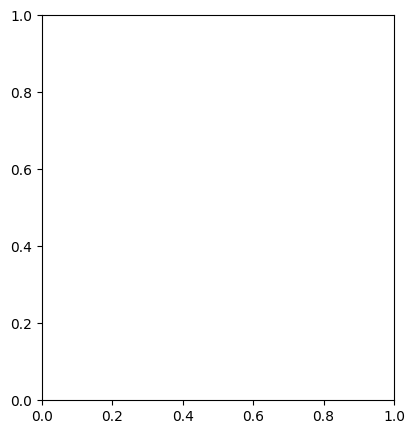

In [24]:
plt.figure(figsize = (10,5))
plt.tight_layout()
ax = plt.subplot(1,2,1)
sns.boxplot(x = 'Model', y = 'Dice Heart', data = results, showmeans = True)
plt.xticks(rotation=25, ha="right" )
plt.ylabel('Dice Heart')
plt.title('Dice Heart')
plt.xlabel(None)

ax = plt.subplot(1,2,2)
sns.boxplot(x = 'Model', y = 'HD Heart', data = results, showmeans = True)
plt.xticks(rotation=25, ha="right" )
plt.ylabel('HD (mm)')
plt.title('Hausdorff Distance')
plt.xlabel(None)

plt.tight_layout()
#plt.savefig('figs/num1.png', dpi=300)
plt.show()

print('Dice')
for model in model_names:
    print(model, '%.3f'%np.mean(results['Dice Heart'][results['Model'] == model]), '+- %.3f' % np.std(results['Dice Heart'][results['Model'] == model]))

print('')

print('Hausdorff')
for model in model_names:
    print(model, '%.3f'%np.mean(results['HD Heart'][results['Model'] == model]), '+- %.3f' % np.std(results['HD Heart'][results['Model'] == model]))

print('')

# Supplementary Results

In [ ]:
from scipy.stats import wilcoxon

model_names = ['PCA', 'VAE', 'MultiAtlas', 'HybridGNet', '1-SC Layer 3', '1-SC Layer 4','1-SC Layer 5','1-SC Layer 6', '2-SC Layers 4-3', '2-SC Layers 5-4', '2-SC Layers 6-5']

nmodels = len(model_names)

pvalues_mse = np.zeros([nmodels,nmodels])

for i in range(0, nmodels):
    for j in range(i+1, nmodels):
        model1 = model_names[i]
        model2 = model_names[j]
                
        mse1 = results1[results1['Model'] == model1]['MSE']
        mse2 = results1[results1['Model'] == model2]['MSE']
        
        pvalue = wilcoxon(mse1, mse2)
        
        pvalues_mse[i, j] = pvalue[1]
        

pvalues_df = pd.DataFrame(pvalues_mse, columns = model_names)
pvalues_df.index = model_names

fig, ax = plt.subplots(figsize=(12, 9), dpi = 100)

# mask
mask = np.tril(np.ones_like(pvalues_df, dtype=bool))

mask = mask[:-1, 1:]
pvalues = pvalues_df.iloc[:-1,1:].copy()

# plot heatmap
sns.heatmap(pvalues, mask=mask, annot=True, fmt=".2e", cmap='Blues_r',
            vmin=0, vmax=0.1, cbar = False)
# yticks
plt.yticks(rotation=0)
plt.title('MSE comparison over Wilcoxon test (p-values)', x = 0.4)

plt.savefig('figs/JSRT_MSE_wilcoxon.png', bbox_inches = 'tight')
plt.show()

In [ ]:
model_names.append('UNet')

nmodels = len(model_names)

pvalues_mse = np.zeros([nmodels,nmodels])

for i in range(0, nmodels):
    for j in range(i+1, nmodels):
        model1 = model_names[i]
        model2 = model_names[j]
                
        mse1 = results[results['Model'] == model1]['Dice Lungs']
        mse2 = results[results['Model'] == model2]['Dice Lungs']
        pvalue = wilcoxon(mse1, mse2)
        
        pvalues_mse[i, j] = pvalue[1]        

pvalues_df = pd.DataFrame(pvalues_mse, columns = model_names)
pvalues_df.index = model_names

fig, ax = plt.subplots(figsize=(12, 9), dpi = 100)

# mask
mask = np.tril(np.ones_like(pvalues_df, dtype=bool))

mask = mask[:-1, 1:]
pvalues = pvalues_df.iloc[:-1,1:].copy()

# plot heatmap
sns.heatmap(pvalues, mask=mask, annot=True, fmt=".2e", cmap='Blues_r',
            vmin=0, vmax=0.1, cbar = False)
# yticks
plt.yticks(rotation=0)
plt.title('Dice lungs comparison over Wilcoxon test (p-values)', x = 0.4)

plt.savefig('figs/JSRT_dice_wilcoxon_lungs.png', bbox_inches='tight')
plt.show()

In [ ]:
nmodels = len(model_names)

pvalues_mse = np.zeros([nmodels,nmodels])

for i in range(0, nmodels):
    for j in range(i+1, nmodels):
        model1 = model_names[i]
        model2 = model_names[j]
                
        mse1 = results[results['Model'] == model1]['Dice Heart']
        mse2 = results[results['Model'] == model2]['Dice Heart']
        pvalue = wilcoxon(mse1, mse2)
        
        pvalues_mse[i, j] = pvalue[1]        

pvalues_df = pd.DataFrame(pvalues_mse, columns = model_names)
pvalues_df.index = model_names

fig, ax = plt.subplots(figsize=(12, 9), dpi = 100)

# mask
mask = np.tril(np.ones_like(pvalues_df, dtype=bool))

mask = mask[:-1, 1:]
pvalues = pvalues_df.iloc[:-1,1:].copy()

# plot heatmap
sns.heatmap(pvalues, mask=mask, annot=True, fmt=".2e", cmap='Blues_r',
            vmin=0, vmax=0.1, cbar = False)
# yticks
plt.yticks(rotation=0)
plt.title('Dice heart comparison over Wilcoxon test (p-values)', x = 0.4)

plt.savefig('figs/JSRT_dice_wilcoxon_heart.png', bbox_inches='tight')
plt.show()

In [ ]:
nmodels = len(model_names)

pvalues_mse = np.zeros([nmodels,nmodels])

for i in range(0, nmodels):
    for j in range(i+1, nmodels):
        model1 = model_names[i]
        model2 = model_names[j]
                
        mse1 = results[results['Model'] == model1]['HD Lungs']
        mse2 = results[results['Model'] == model2]['HD Lungs']
        pvalue = wilcoxon(mse1, mse2)
        
        pvalues_mse[i, j] = pvalue[1]        

pvalues_df = pd.DataFrame(pvalues_mse, columns = model_names)
pvalues_df.index = model_names

fig, ax = plt.subplots(figsize=(12, 9), dpi = 100)

# mask
mask = np.tril(np.ones_like(pvalues_df, dtype=bool))

mask = mask[:-1, 1:]
pvalues = pvalues_df.iloc[:-1,1:].copy()

# plot heatmap
sns.heatmap(pvalues, mask=mask, annot=True, fmt=".2e", cmap='Blues_r',
            vmin=0, vmax=0.1, cbar = False)
# yticks
plt.yticks(rotation=0)
plt.title('HD lungs comparison over Wilcoxon test (p-values)', x = 0.4)

plt.savefig('figs/JSRT_HD_wilcoxon_lungs.png', bbox_inches='tight')
plt.show()

In [ ]:
nmodels = len(model_names)

pvalues_mse = np.zeros([nmodels,nmodels])

for i in range(0, nmodels):
    for j in range(i+1, nmodels):
        model1 = model_names[i]
        model2 = model_names[j]
                
        mse1 = results[results['Model'] == model1]['HD Heart']
        mse2 = results[results['Model'] == model2]['HD Heart']
        pvalue = wilcoxon(mse1, mse2)
        
        pvalues_mse[i, j] = pvalue[1]        

pvalues_df = pd.DataFrame(pvalues_mse, columns = model_names)
pvalues_df.index = model_names

fig, ax = plt.subplots(figsize=(12, 9), dpi = 100)

# mask
mask = np.tril(np.ones_like(pvalues_df, dtype=bool))

mask = mask[:-1, 1:]
pvalues = pvalues_df.iloc[:-1,1:].copy()

# plot heatmap
sns.heatmap(pvalues, mask=mask, annot=True, fmt=".2e", cmap='Blues_r',
            vmin=0, vmax=0.1, cbar = False)
# yticks
plt.yticks(rotation=0)
plt.title('HD heart comparison over Wilcoxon test (p-values)', x = 0.4)

plt.savefig('figs/JSRT_HD_wilcoxon_heart.png', bbox_inches='tight')
plt.show()